Enter delta_f (1, 2, or 4): 2
Enter the number of breakpoints: 7
Enter frequency value 1: 28
Enter PSD value for frequency 28.0: 0.023
Enter frequency value 2: 130
Enter PSD value for frequency 130.0: 0.056
Enter frequency value 3: 350
Enter PSD value for frequency 350.0: 0.056
Enter frequency value 4: 780
Enter PSD value for frequency 780.0: 0.012
Enter frequency value 5: 1300
Enter PSD value for frequency 1300.0: 0.012
Enter frequency value 6: 1750
Enter PSD value for frequency 1750.0: 0.035
Enter frequency value 7: 2000
Enter PSD value for frequency 2000.0: 0.1
Enter log, linear, or both for graph scale: both


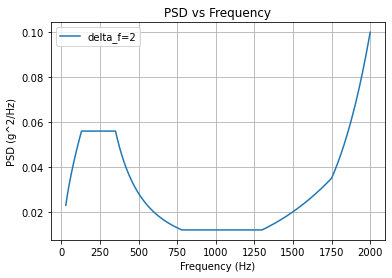

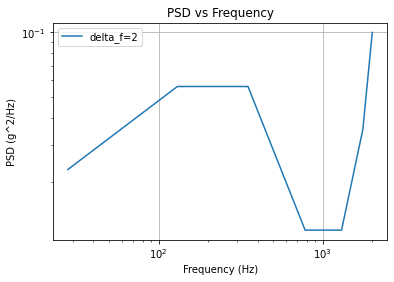

Area under the curve: 59.442280713478766
Delta_f = 2:
Grms value: 7.709882016832603
User input data:
     Frequency (Hz)       PSD
0              28.0  0.023000
1              30.0  0.023938
2              32.0  0.024851
3              34.0  0.025739
4              36.0  0.026606
..              ...       ...
982          1992.0  0.096898
983          1994.0  0.097666
984          1996.0  0.098438
985          1998.0  0.099216
986          2000.0  0.100000

[987 rows x 2 columns]
Do you want to save the data points to a CSV file? (yes/no): no
Data not saved.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def calculate_slope(freq1, freq2, psd1, psd2):
    slope = 10 * np.log10(psd2 / psd1) / np.log2(freq2 / freq1)
    return slope

def get_input_points(num_points):
    freq_points_input = []
    psd_values_input = []
    for i in range(num_points):
        freq_input_success = False
        while not freq_input_success:
            try:
                freq = float(input(f"Enter frequency value {i+1}: "))
                if freq <= 0:
                    raise ValueError("Frequency value should be positive.")
                if freq <= freq_points_input[-1] if freq_points_input else False:
                    raise ValueError("Frequency values should be increasing.")
                freq_points_input.append(freq)
                freq_input_success = True
            except ValueError as e:
                print(e)
        
        psd_input_success = False
        while not psd_input_success:
            try:
                psd = float(input(f"Enter PSD value for frequency {freq}: "))
                if psd <= 0:
                    raise ValueError("PSD value should be positive.")
                psd_values_input.append(psd)
                psd_input_success = True
            except ValueError as e:
                print(e)
    return freq_points_input, psd_values_input

def calculate_psd_values(freq, psd, delta_f):
    psd_values_all = [psd[0]]  # Add the first PSD value
    freq_all = [freq[0]]  # Add the first frequency value
    for i in range(len(freq) - 1):
        f1, f2 = freq[i], freq[i+1]
        psd1 = psd[i]
        slope = calculate_slope(f1, f2, psd1, psd[i+1])
        num_points = int((f2 - f1) / delta_f)
        for j in range(1, num_points):
            freq_new = f1 + j * delta_f
            psd_new = psd1 * (10 ** (slope * np.log2(freq_new / f1) / 10))
            freq_all.append(freq_new)
            psd_values_all.append(psd_new)
        freq_all.append(f2)
        psd_values_all.append(psd[i+1])  # Add the next PSD value
    return freq_all, psd_values_all

def get_delta_f():
    while True:
        try:
            delta_f = int(input("Enter delta_f (1, 2, or 4): "))
            if delta_f not in [1, 2, 4]:
                raise ValueError
            return delta_f
        except ValueError:
            print("Invalid delta_f value. Please enter 1, 2, or 4.")

def generate_graph(freq_all, psd_values_all, delta_f, scale='linear'):
    plt.plot(freq_all, psd_values_all, label=f'delta_f={delta_f}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (g^2/Hz)')
    plt.grid(True)
    plt.title('PSD vs Frequency')
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
    plt.legend()
    plt.show()

def calculate_unit_area(freq_all, psd_values_all, delta_f):
    unit_areas = []
    for i in range(len(freq_all) - 1):
        f1, f2 = freq_all[i], freq_all[i+1]
        psd1, psd2 = psd_values_all[i], psd_values_all[i+1]
        area = (f2 - f1) * ((psd1 + psd2) / 2)
        unit_areas.append(area)
    return sum(unit_areas)

def main():
    delta_f = get_delta_f()
    num_points = int(input("Enter the number of breakpoints: "))
    freq_points_input, psd_values_input = get_input_points(num_points)

    freq_all, psd_values_all = calculate_psd_values(freq_points_input, psd_values_input, delta_f)

    scale_option = input("Enter log, linear, or both for graph scale: ")
    if scale_option not in ['log', 'linear', 'both']:
        print("Invalid option. Showing linear scale graph by default.")
        scale_option = 'linear'

    if scale_option == 'both':
        generate_graph(freq_all, psd_values_all, delta_f, scale='linear')
        generate_graph(freq_all, psd_values_all, delta_f, scale='log')
    else:
        generate_graph(freq_all, psd_values_all, delta_f, scale=scale_option)

    area_under_curve = calculate_unit_area(freq_all, psd_values_all, delta_f)

    print(f"Area under the curve: {area_under_curve}")
    print(f"Delta_f = {delta_f}:")
    
    grms_value = np.sqrt(area_under_curve)
    print(f"Grms value: {grms_value}")

    df = pd.DataFrame({"Frequency (Hz)": freq_all, "PSD": psd_values_all})
    print("User input data:")
    print(df)
    
    save_option = input("Do you want to save the data points to a CSV file? (yes/no): ").lower()
    if save_option == 'yes':
        file_name = input("Enter the Excel file name to save data points: ")
        df.to_csv(file_name + '.csv', index=False, encoding='utf-8')
        print(f"Data saved to {file_name}.csv")
    elif save_option == 'no':
        print("Data not saved.")
    else:
        print("Invalid option. Data not saved.")

if __name__ == "__main__":
    main()


In [ ]:
import openpyxl